In [6]:
%matplotlib inline
%reload_ext autoreload 
%autoreload 2
from strauss.sonification import Sonification
from strauss.sources import Events
from strauss import channels
from strauss.score import Score
from strauss.tts_caption import render_caption
import numpy as np
from strauss.generator import Sampler

# platform agnostic absolute path for samples...
import strauss
sample_path = '/'.join(strauss.__file__.split('/')[:-3] +['data','samples','glockenspiels'])

In [7]:
# setup used in stars appearing example

chords = [['Db3','Gb3', 'Ab3', 'Eb4','F4']]
length = 6
system = 'mono'
score =  Score(chords, length)

maplims =  {'time': ('0', '150'),
            'pitch' : ('0', '100'),
           'phi':('0','100'),
            'theta':('0','100')}

events = Events(maplims.keys())

data = {'pitch':np.arange(5),
        'time':np.arange(5),
       'phi': np.arange(5),
       'theta': np.arange(5)}


generator = Sampler(sample_path)

events.fromdict(data)
events.apply_mapping_functions(map_lims=maplims)

In [8]:
# Alternatively, read a caption in from a text file
with open('input_text.txt', 'w') as f:
    f.write('You are about to hear a sonification. It uses a glockenspiel to represent stars.')
with open('input_text.txt', 'r') as f:
    caption = f.read().replace('\n', '')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 20.89it/s]


Rendering caption (this can take a while if the caption is long, or if the TTS model needs downloading)...


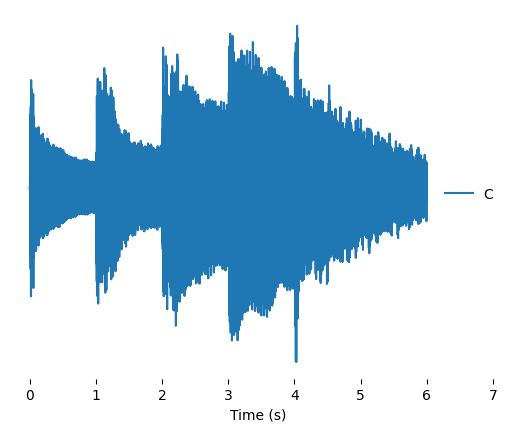

In [9]:
# render at default 48 kHz rate
soni = Sonification(score, events, generator, system, caption='This is a sonification.', samprate=48000,
                    model='tts_models/en/jenny/jenny')
soni.render()
soni.notebook_display()